In [1]:
!pip install pandas
!pip install matplotlib
!pip install pandas_datareader
!pip install yfinance
!pip install keras
!pip install tensorflow

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [3]:
start = '2010-01-01'
end = '2024-03-01'

# Fetch data
df = yf.download('TSLA', start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-23,195.309998,197.570007,191.500000,191.970001,191.970001,78841900
2024-02-26,192.289993,201.779999,192.000000,199.399994,199.399994,111747100
2024-02-27,204.039993,205.600006,198.259995,199.729996,199.729996,108645400
2024-02-28,200.419998,205.300003,198.440002,202.039993,202.039993,99806200
2024-02-29,204.179993,205.279999,198.449997,201.880005,201.880005,85907000


In [6]:
df_reset = df.reset_index()
df_reset.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [7]:
df_drop = df_reset.drop(['Date','Adj Close'], axis = 1)
df_drop.head()

,Open,High,Low,Close,Volume
0,1.266667,1.666667,1.169333,1.592667,281494500
1,1.719333,2.028000,1.553333,1.588667,257806500
2,1.666667,1.728000,1.351333,1.464000,123282000
3,1.533333,1.540000,1.247333,1.280000,77097000
4,1.333333,1.333333,1.055333,1.074000,103003500


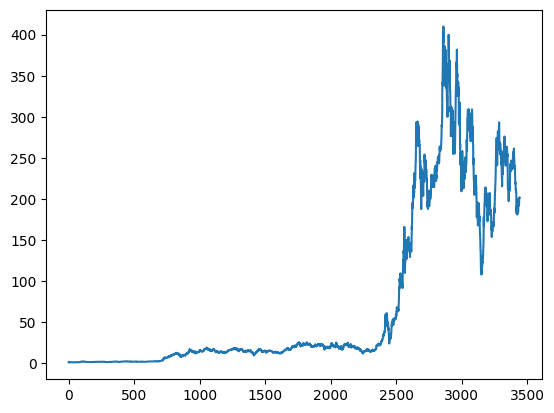

In [8]:
plt.plot(df_drop.Close)

In [9]:
ma100 = df_drop.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3436    225.6393
3437    225.1173
3438    224.6493
3439    224.0581
3440    223.4764
Name: Close, Length: 3441, dtype: float64

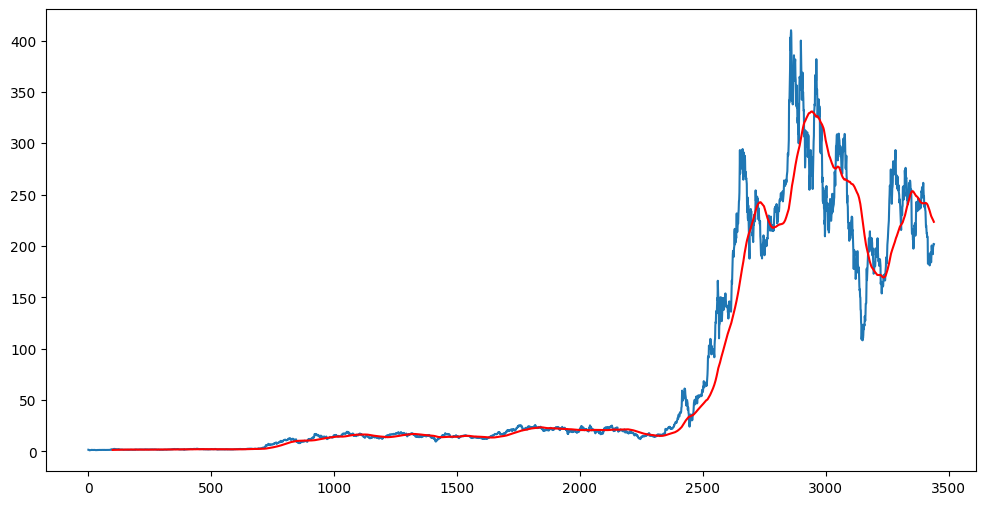

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df_drop.Close)
plt.plot(ma100, 'r')

In [11]:
ma200 = df_drop.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3436    233.98370
3437    234.13495
3438    234.29090
3439    234.44070
3440    234.61020
Name: Close, Length: 3441, dtype: float64

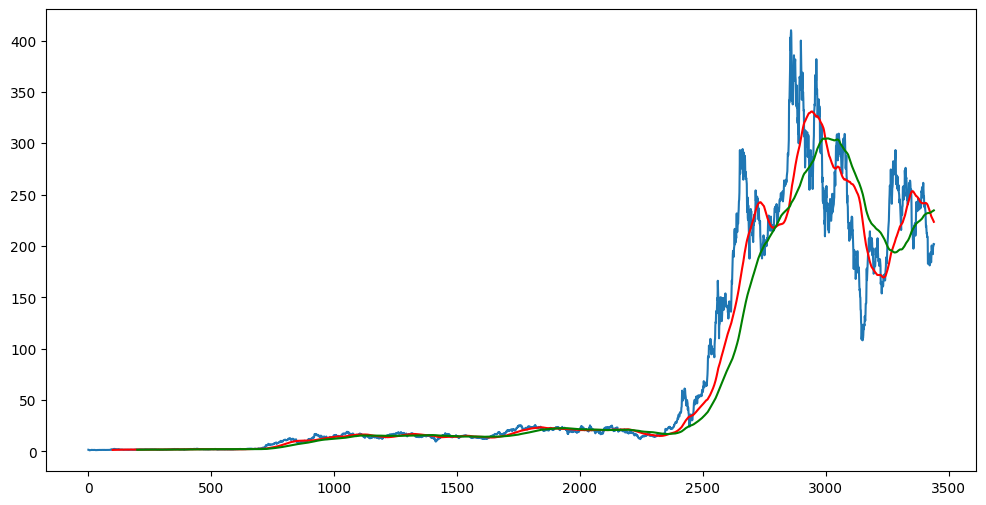

In [12]:
plt.figure(figsize = (12,6))
plt.plot(df_drop.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [13]:
df.shape

(3441, 6)

In [14]:
index_training = int(len(df_drop) * 0.7)
index_validating = int(len(df_drop) * 0.9)  # 70% + 20%
index_testing = len(df_drop)  # The remaining 10%

data_training = pd.DataFrame(df_drop['Close'][:index_training])
data_validating = pd.DataFrame(df_drop['Close'][index_training:index_validating])
data_testing = pd.DataFrame(df_drop['Close'][index_validating:index_testing])

In [15]:
!pip install scikit-learn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [16]:
data_training_transform = scaler.fit_transform(data_training)

In [17]:
x_train = []
y_train = []

for i in range(100, data_training_transform.shape[0]):
    x_train.append(data_training_transform[i-100 : i])
    y_train.append(data_training_transform[i, 0])

In [18]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [20]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 150, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(units = 1 )) # 1 unit = Closing prices

C:\Users\NolanM\Desktop\Leetcode\Python\LeetcodeNotebook\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 150)                 │         138,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 150)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             151 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 220,911 (862.93 KB)

 Trainable params: 220,911 (862.93 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
!pip install --upgrade keras tensorflow

In [23]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 12s 110ms/step - loss: 0.0560
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - loss: 0.0059
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - loss: 0.0071
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 109ms/step - loss: 0.0045
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - loss: 0.0044
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - loss: 0.0039
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - loss: 0.0041
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - loss: 0.0041
Epoch 9/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - loss: 0.0040
Epoch 10/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - loss: 0.0037
Epoch 11/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 112ms/step - loss: 0.0029
Epoch 12/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - loss: 0.0034
Epoch 13/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - loss: 0.0033
Epoch 14/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - loss: 0.0032
Epoch 15/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - l

In [24]:
model.save('keras_model.h5')

In [26]:
data_validating.head()

,Close
2408,38.146667
2409,37.654667
2410,37.201332
2411,37.793331
2412,38.732666


In [37]:
past_100_days_validating = data_training.tail(100)

In [40]:
final_df_validating = pd.concat([past_100_days_validating, data_validating], ignore_index=True)

In [43]:
final_df_validating

,Close
0,14.780667
1,15.040667
2,15.000667
3,14.712000
4,15.305333
...,...
783,223.070007
784,222.960007
785,216.500000
786,217.240005


In [44]:
input_validating_data = scaler.fit_transform(final_df_validating)

In [45]:
input_validating_data.shape

(788, 1)

In [47]:
x_validate = []
y_validate = []

for i in range(100, input_validating_data.shape[0]):
    x_validate.append(input_validating_data[i - 100 : i])
    y_validate.append(input_validating_data[i, 0])

In [48]:
x_validate_np, y_validate_np = np.array(x_validate), np.array(y_validate)

In [51]:
print(x_validate_np.shape)
print(y_validate_np.shape)

(688, 100, 1)
(688,)


In [57]:
y_validate_predicted = model.predict(x_validate_np)

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


In [58]:
y_validate_predicted.shape

(688, 1)

In [59]:
y_validate_predicted

array([[0.04434782],
       [0.04537094],
       [0.04645129],
       [0.04758705],
       [0.04880174],
       [0.05021694],
       [0.05208649],
       [0.05458407],
       [0.05781078],
       [0.06184888],
       [0.06679092],
       [0.07267861],
       [0.07943983],
       [0.08694793],
       [0.09491624],
       [0.10302394],
       [0.11098951],
       [0.11855666],
       [0.12553015],
       [0.13178955],
       [0.13726729],
       [0.14193952],
       [0.14582461],
       [0.148985  ],
       [0.15150952],
       [0.15347958],
       [0.15497361],
       [0.1560691 ],
       [0.15683003],
       [0.1573243 ],
       [0.15761293],
       [0.15774435],
       [0.15775695],
       [0.15768215],
       [0.15754713],
       [0.15736711],
       [0.15714705],
       [0.15684463],
       [0.15636909],
       [0.15553077],
       [0.15410918],
       [0.1518415 ],
       [0.14838624],
       [0.14353935],
       [0.1372523 ],
       [0.12970814],
       [0.12119331],
       [0.112

In [55]:
y_validate

[0.05928954634333153,
 0.05804478829116927,
 0.056897854372495796,
 0.058395607870127195,
 0.06077211857004955,
 0.07086173791666743,
 0.07250791656711296,
 0.09433838146622191,
 0.1123957842064278,
 0.0866978012689313,
 0.08910298555809944,
 0.08895287145270435,
 0.09286761260525535,
 0.09339047371968794,
 0.09219463738542767,
 0.09838636650067366,
 0.0977167691860079,
 0.1075618088965886,
 0.11751648575756717,
 0.11447881285472618,
 0.1147469895711087,
 0.10341093287090518,
 0.09769652105735167,
 0.09413597738892053,
 0.07730309422337826,
 0.07544607638388419,
 0.0882023105768865,
 0.08852108831259435,
 0.08919406353242203,
 0.08498415137566612,
 0.08143204281898211,
 0.06532779309917813,
 0.07162410215823674,
 0.0697519126989869,
 0.05732458030602054,
 0.05497506389392061,
 0.03784700972417343,
 0.035338944094931254,
 0.023704348136518533,
 0.034907156129242445,
 0.03488860660432479,
 0.03602878953825324,
 0.04795517859570898,
 0.05373199479433931,
 0.051861484636512814,
 0.04953389

In [56]:
scaler.scale_

array([0.00252999])

In [63]:
scale_factor = 1/0.00252999
y_predicted_scale_again = y_validate_predicted * scale_factor
y_validate_scale_again = y_validate_np * scale_factor

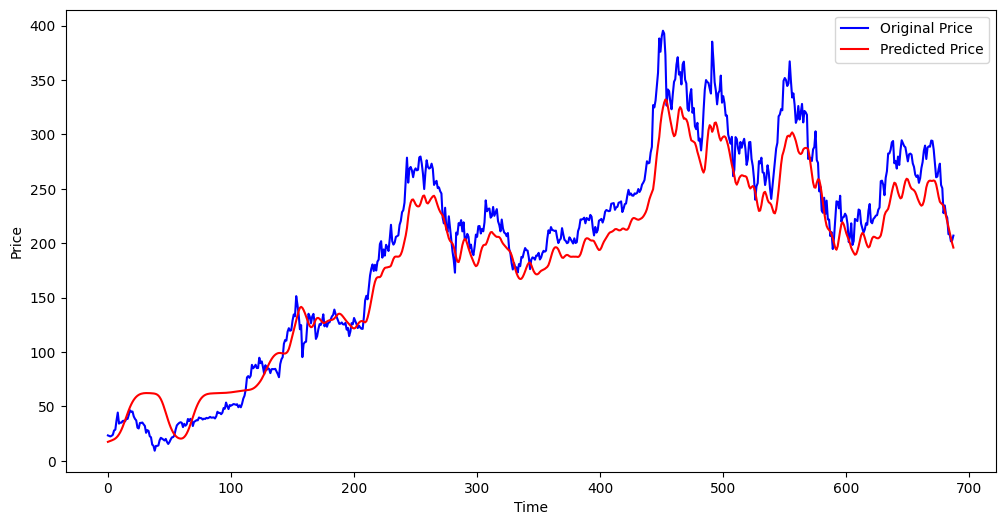

In [64]:
plt.figure(figsize=(12,6))
plt.plot(y_validate_scale_again, 'b', label = 'Original Price')
plt.plot(y_predicted_scale_again, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()